In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
N_DETECTOR = 8
N_BINS = 1024
CH_SIZE = 4 # 4 - bytes per channel

In [5]:
filename = '../../DT5550_DAQ/daq/ReadoutClient/waveform.output'

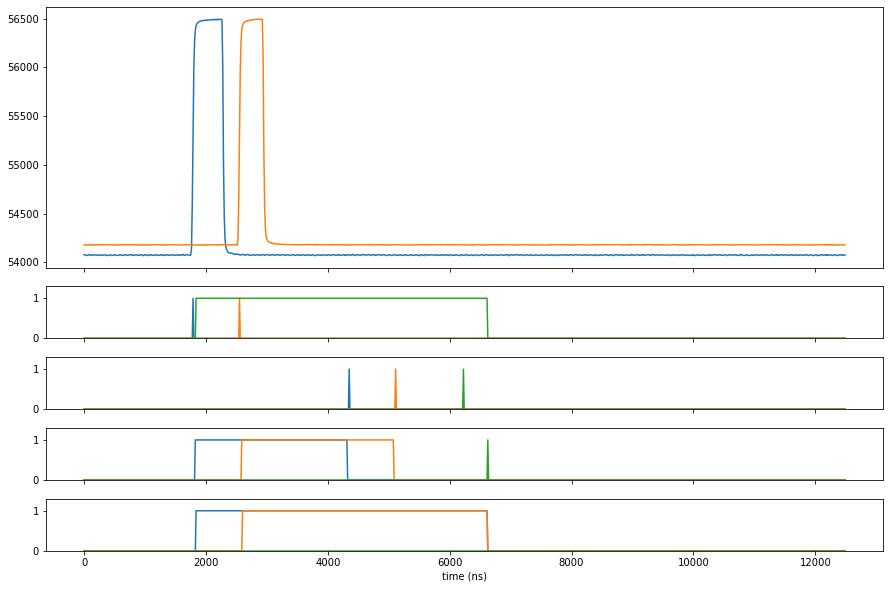

In [29]:
f = open(filename,"rb")
tt = np.zeros(N_BINS)
analog = np.zeros([N_DETECTOR,N_BINS])
d0 = np.zeros([N_DETECTOR,N_BINS])
d1 = np.zeros([N_DETECTOR,N_BINS])
d2 = np.zeros([N_DETECTOR,N_BINS])
d3 = np.zeros([N_DETECTOR,N_BINS])

# process single event
wave = f.read(N_BINS*N_DETECTOR*CH_SIZE)
for idet in range(N_DETECTOR):
    for i in range(N_BINS):
        i0 = i*CH_SIZE + idet*N_BINS*CH_SIZE
        i1 = i0+CH_SIZE
        tt[i] = i*12.5
        analog[idet][i] = int.from_bytes(wave[i0:i1],byteorder='little') & 0x0000ffff
        d0[idet][i] = (int.from_bytes(wave[i0:i1],byteorder='little') & 0x00010000) >> 16
        d1[idet][i] = (int.from_bytes(wave[i0:i1],byteorder='little') & 0x00020000) >> 17
        d2[idet][i] = (int.from_bytes(wave[i0:i1],byteorder='little') & 0x00040000) >> 18
        d3[idet][i] = (int.from_bytes(wave[i0:i1],byteorder='little') & 0x00080000) >> 19

# plot single event
imin=0
imax=1000
fig, axs = plt.subplots(5,1, sharex=True, gridspec_kw={'height_ratios':[5,1,1,1,1]}, figsize=(15,10))
for idet in range(2):
    axs[0].plot(tt[imin:imax],analog[idet][imin:imax])
    axs[1].plot(tt[imin:imax],d0[idet][imin:imax])
    axs[2].plot(tt[imin:imax],d1[idet][imin:imax])
    axs[3].plot(tt[imin:imax],d2[idet][imin:imax])
    axs[4].plot(tt[imin:imax],d3[idet][imin:imax])

axs[1].plot(tt[imin:imax],d0[7][imin:imax])
axs[2].plot(tt[imin:imax],d1[7][imin:imax])
axs[3].plot(tt[imin:imax],d2[7][imin:imax])
axs[4].plot(tt[imin:imax],d3[7][imin:imax])    
    
for i in range(1,5):
    axs[i].set_ylim([0,1.3])

plt.xlabel('time (ns)')
    
f.close()